In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./clean_data.csv')
df.drop_duplicates(subset=['country'],inplace=True)
df = df.set_index('country')
df.head()

,total_cases,total_deaths,total_recovered,active_cases,serious_cases,cases_per_million,deaths_per_million,total_tests,tests_per_million,population,...,median_age,median_age_male,median_age_female,gdp_per_capita,avg_temp_c,area_km,pop_p_km,asl_meters,mobility_composite,healthcare_pc
country,,,,,,,,,,,,,,,,,,,,,
United States,16295458,302750.0,9507419.0,6485289.0,27324.0,49102.0,912.0,217190821.0,654445.0,3.318704e+08,...,39.55,38.35,40.65,67426.0,8.55,9.833517e+06,34.000000,760.0,-25.947264,10246.138672
India,9827026,142662.0,9324328.0,360036.0,8944.0,7090.0,103.0,152697399.0,110167.0,1.386049e+09,...,28.10,27.20,28.60,9027.0,23.65,3.287240e+06,415.000000,621.0,NaN,69.293098
Brazil,6836313,180453.0,5954745.0,701115.0,8318.0,32060.0,846.0,25700000.0,120525.0,2.132342e+08,...,32.60,31.10,32.80,17106.0,24.95,8.515767e+06,25.000000,320.0,-30.393815,928.799316
Russian Federation,2597711,45893.0,2059840.0,491978.0,2300.0,17797.0,314.0,81564365.0,558803.0,1.459626e+08,...,39.60,36.60,42.50,30820.0,-5.10,1.712524e+07,9.000000,600.0,-26.168398,585.873230
France,2351372,57567.0,175891.0,2117914.0,2884.0,35988.0,881.0,28508991.0,436329.0,6.533828e+07,...,41.40,39.60,43.10,48640.0,10.70,1.819891e+05,350.666667,375.0,-48.319148,4379.727051


## Correlation Matrix

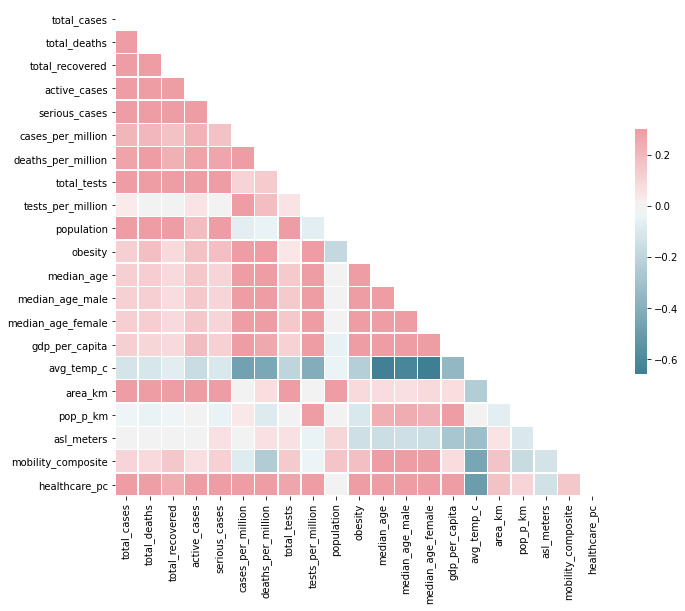

In [3]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
np.fill_diagonal(corr.values, 0)
corr.sort_values(by='deaths_per_million')

,total_cases,total_deaths,total_recovered,active_cases,serious_cases,cases_per_million,deaths_per_million,total_tests,tests_per_million,population,...,median_age,median_age_male,median_age_female,gdp_per_capita,avg_temp_c,area_km,pop_p_km,asl_meters,mobility_composite,healthcare_pc
avg_temp_c,-0.118387,-0.107387,-0.076714,-0.160320,-0.101210,-0.468579,-0.439393,-0.196448,-0.406712,-0.039204,...,-0.637675,-0.618288,-0.656262,-0.349099,0.000000,-0.236603,0.008175,-0.314382,-0.448394,-0.494545
mobility_composite,0.103427,0.081648,0.152304,0.067007,0.117173,-0.078949,-0.244310,0.140430,-0.034955,0.161163,...,0.347702,0.311902,0.372041,0.077120,-0.448394,0.167506,-0.165410,-0.124016,0.000000,0.151040
pop_p_km,-0.032037,-0.046125,-0.029950,-0.024527,-0.047348,0.035143,-0.082553,-0.024392,0.365592,-0.024323,...,0.236149,0.245521,0.225809,0.333145,0.008175,-0.067915,0.000000,-0.103333,-0.165410,0.103564
population,0.476168,0.403565,0.562955,0.190047,0.351407,-0.065100,-0.039984,0.769880,-0.072545,0.000000,...,0.009153,0.007294,0.009224,-0.048123,-0.039204,0.448391,-0.024323,0.100583,0.161163,-0.014740
deaths_per_million,0.278721,0.381072,0.230654,0.277695,0.268169,0.769791,0.000000,0.135196,0.184407,-0.039984,...,0.485900,0.482335,0.487298,0.261809,-0.439393,0.073819,-0.082553,0.064595,-0.244310,0.343134
asl_meters,-0.007022,0.021934,0.001444,-0.011239,0.062164,-0.007349,0.064595,0.063727,-0.041991,0.100583,...,-0.151784,-0.143661,-0.153883,-0.277020,-0.314382,0.055506,-0.103333,0.000000,-0.124016,-0.131048
area_km,0.503589,0.514010,0.505469,0.394499,0.477994,-0.000537,0.073819,0.641725,0.002250,0.448391,...,0.077198,0.067763,0.082897,0.072960,-0.236603,0.000000,-0.067915,0.055506,0.167506,0.170847
total_tests,0.820333,0.736252,0.789492,0.702779,0.758417,0.109074,0.135196,0.000000,0.050838,0.769880,...,0.142335,0.135976,0.145402,0.115263,-0.196448,0.641725,-0.024392,0.063727,0.140430,0.266828
tests_per_million,0.026516,0.018705,0.001415,0.056607,0.010172,0.391969,0.184407,0.050838,0.000000,-0.072545,...,0.463073,0.473724,0.447833,0.667395,-0.406712,0.002250,0.365592,-0.041991,-0.034955,0.566960
total_recovered,0.968057,0.913139,0.000000,0.683792,0.873317,0.171865,0.230654,0.789492,0.001415,0.562955,...,0.084959,0.079268,0.083805,0.084228,-0.076714,0.505469,-0.029950,0.001444,0.152304,0.242209


In [5]:
ddf = df.apply(pd.to_numeric, errors='coerce')
ddf = ddf.apply(lambda x: (x - x.mean())/x.std(), axis=0)
ddf.fillna(0, inplace=True)
# ddf.dropna(how='any',inplace=True)
ddf

,total_cases,total_deaths,total_recovered,active_cases,serious_cases,cases_per_million,deaths_per_million,total_tests,tests_per_million,population,...,median_age,median_age_male,median_age_female,gdp_per_capita,avg_temp_c,area_km,pop_p_km,asl_meters,mobility_composite,healthcare_pc
country,,,,,,,,,,,,,,,,,,,,,
United States,11.247397,9.750950,9.037078,13.363032,9.726372,2.167787,2.034436,9.072389,0.755298,2.071148,...,1.003220,1.002111,0.993262,1.860564,-1.185212,4.822966,-0.209942,0.168033,0.961284,4.855221
India,6.690161,4.447853,8.858676,0.591504,2.986453,-0.376545,-0.465404,6.306728,-0.356849,9.465178,...,-0.283374,-0.311537,-0.293719,-0.603108,0.617698,1.382762,0.033231,-0.055891,0.000000,-0.574352
Brazil,4.583099,5.699723,5.575387,1.302675,2.756900,1.135689,1.830494,0.860719,-0.335684,1.239031,...,0.222275,0.147945,0.154856,-0.262280,0.772916,4.130461,-0.215686,-0.540793,0.447530,-0.115787
Russian Federation,1.596856,1.242270,1.780229,0.866611,0.550108,0.271892,0.186594,3.256342,0.559869,0.767187,...,1.008839,0.795933,1.190849,0.316271,-2.814996,8.654918,-0.225898,-0.089722,0.935735,-0.298745
France,1.423301,1.628984,-0.055473,4.256788,0.764260,1.373576,1.938645,0.981177,0.309612,0.201686,...,1.211098,1.149381,1.254931,1.068041,-0.928506,-0.249111,-0.007830,-0.452189,-1.623563,1.725360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS Zaandam,-0.233316,-0.277922,-0.226852,-0.159193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Marshall Islands,-0.233319,0.000000,-0.226855,-0.159193,0.000000,-0.801872,0.000000,0.000000,0.000000,-0.256181,...,-0.867679,-0.829928,-0.891818,-0.816363,1.065441,-0.344655,-0.034424,0.000000,0.000000,-0.268694
Wallis and Futuna,-0.233320,0.000000,-0.226858,-0.159189,0.000000,-0.789639,0.000000,-0.241320,-0.371373,-0.256519,...,0.177328,0.171508,0.218938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Deaths per million vs GDP per capita (log-log)

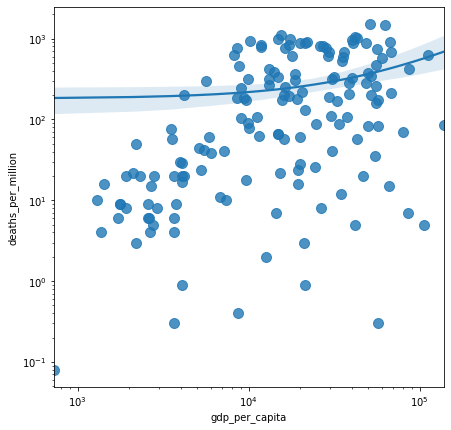

In [6]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("gdp_per_capita", "deaths_per_million", df, ax=ax, scatter_kws={"s": 100})

In [7]:
corr['deaths_per_million']['gdp_per_capita']

0.2618085499487694

## Deaths per million vs Healthcare spending per capita (log-log)


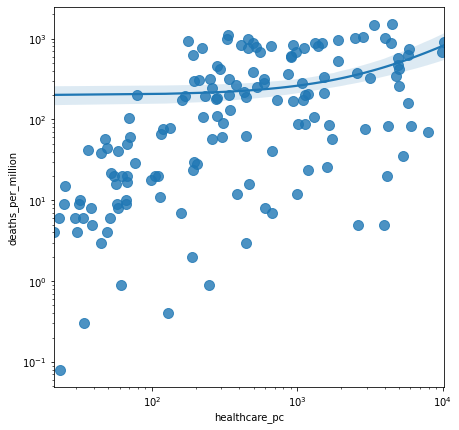

In [8]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("healthcare_pc", "deaths_per_million", df, ax=ax, scatter_kws={"s": 100})

In [9]:
corr['deaths_per_million']['healthcare_pc']

0.3431338896779066

## Linear Regression Weights

In [10]:
y = ddf['deaths_per_million'].values
keys = list(set(ddf.keys()) - set(['total_deaths','deaths_per_million','median_age']))
x = ddf[keys].values

In [11]:
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.7045440423242023

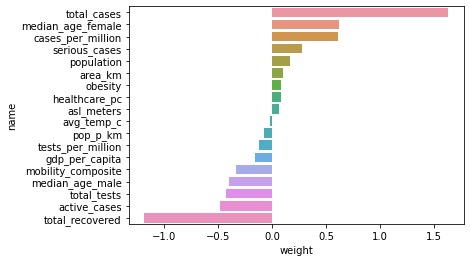

In [12]:
weights = pd.DataFrame({'weight':reg.coef_, 'name':keys})
weights.sort_values(by=['weight'], inplace=True, ascending=False,)
sns.barplot(x="weight", y="name", data=weights)

In [13]:
y = ddf['deaths_per_million'].values
keys = ['obesity', 'gdp_per_capita','avg_temp_c','median_age_male','median_age_female','population','tests_per_million','mobility_composite','asl_meters','pop_p_km', 'healthcare_pc']
x = ddf[keys].values

In [14]:
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.3870647294679097

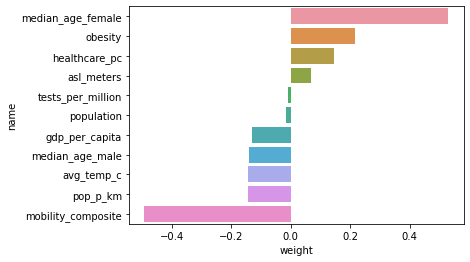

In [15]:
weights = pd.DataFrame({'weight':reg.coef_, 'name':keys})
weights.sort_values(by=['weight'], inplace=True, ascending=False,)
sns.barplot(x="weight", y="name", data=weights)

In [16]:
x.shape

(213, 11)

## Cases per test per million

In [17]:
df['cases_per_test'] = df['total_cases']/df['total_tests']
df.sort_values(by=['cases_per_test'], inplace=True, ascending=False,)
df['cases_per_test'].head()

country
French Polynesia                   0.592601
Honduras                           0.402791
Bolivia, Plurinational State of    0.390234
Mexico                             0.390179
Argentina                          0.353743
Name: cases_per_test, dtype: float64

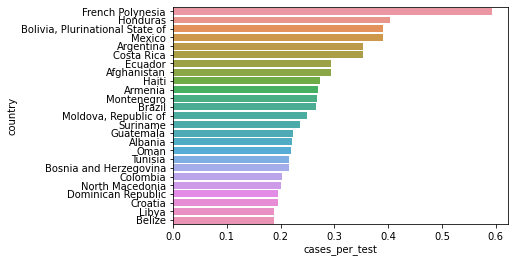

In [18]:
sdf = df.head(25)
sns.barplot(x="cases_per_test", y=sdf.index, data=sdf)

In [19]:
df['cases_per_test_per_million'] = df['cases_per_million']/df['tests_per_million']
df.sort_values(by=['cases_per_test_per_million'], inplace=True, ascending=False,)
df['cases_per_test_per_million'].head()

country
French Polynesia                   0.592601
Honduras                           0.402798
Bolivia, Plurinational State of    0.390253
Mexico                             0.390191
Argentina                          0.353748
Name: cases_per_test_per_million, dtype: float64

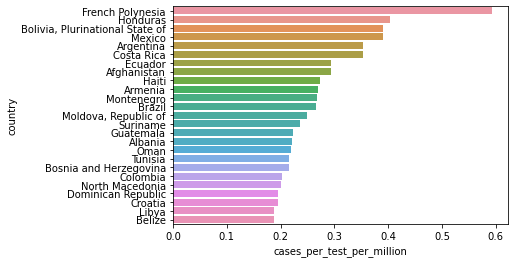

In [20]:
sdf = df.head(25)
sns.barplot(x="cases_per_test_per_million", y=sdf.index, data=sdf)

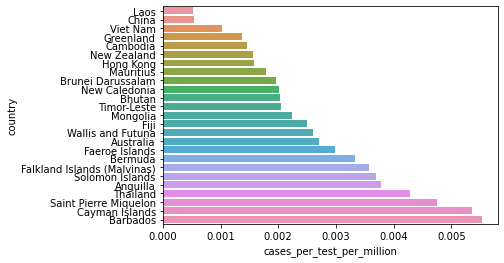

In [21]:
df.sort_values(by=['cases_per_test_per_million'], inplace=True, ascending=True,)
sdf = df.dropna(subset=['cases_per_test_per_million']).head(25)
sns.barplot(x="cases_per_test_per_million", y=sdf.index, data=sdf)